In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from catboost import CatBoostRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("datasets/telomerase_06_descriptors.csv")

In [3]:
df = df.dropna()

In [7]:
X = df.drop("pIC50", axis=1)
y = df["pIC50"]

Remove low variance features

In [8]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(664, 146)

Split the train and test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Model Training

Train a Catboost Regressor model

In [11]:
regressor = CatBoostRegressor()
regressor.fit(X_train, y_train, verbose=0)

In [12]:
y_train_pred = regressor.predict(X_train)

In [13]:
print(f"Training R2 = {r2_score(y_train, y_train_pred):.3f}")
print(f"Training RMSE = {mean_squared_error(y_train, y_train_pred, squared=False):.3f}")

Training R2 = 0.822
Training RMSE = 0.404


## Model Evaluation

Predict on test set

In [14]:
y_test_pred = regressor.predict(X_test)

In [15]:
print(f"Testing R2 = {r2_score(y_test, y_test_pred):.3f}")
print(f"Testing RMSE = {mean_squared_error(y_test, y_test_pred, squared=False):.3f}")

Testing R2 = 0.267
Testing RMSE = 0.849


<function matplotlib.pyplot.show(close=None, block=None)>

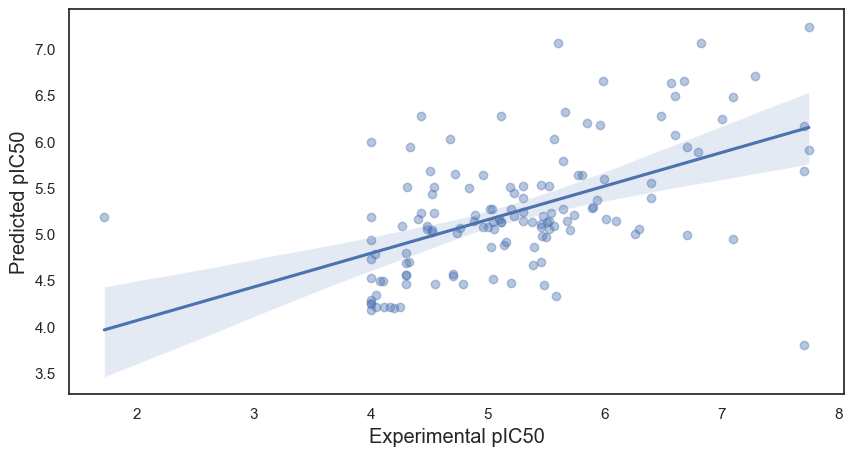

In [22]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large')
ax.set_ylabel('Predicted pIC50', fontsize='large')
ax.figure.set_size_inches(10, 5)
plt.show